In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

# Display the first few rows of the training data
print(train_data.head())

# Display basic information about the dataset
print(train_data.info())
print(train_data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [4]:
# Fill missing values for 'Age' with the median value
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the mode (most frequent value)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Fill missing values for 'Fare' in the test set with the median value
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Drop 'Cabin' and 'Ticket' columns as they contain too many missing values and are less likely to be informative
train_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
test_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

/tmp/ipykernel_36/137469191.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
/tmp/ipykernel_36/137469191.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [8]:
# Convert 'Sex' and 'Embarked' into numerical values using LabelEncoder
label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()

train_data['Sex'] = label_encoder_sex.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder_embarked.fit_transform(train_data['Embarked'])

test_data['Sex'] = label_encoder_sex.transform(test_data['Sex'])
test_data['Embarked'] = label_encoder_embarked.transform(test_data['Embarked'])

In [9]:
# Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Drop irrelevant features
train_data.drop(['Name', 'PassengerId'], axis=1, inplace=True)
test_data.drop(['Name', 'PassengerId'], axis=1, inplace=True)

# Separate features (X) and target variable (y)
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [10]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_data = scaler.transform(test_data)

In [11]:
# Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Predict on the validation set
y_pred_rf = rf_model.predict(X_val)

# Print evaluation metrics
print("Random Forest Model Accuracy:", accuracy_score(y_val, y_pred_rf))
print(confusion_matrix(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

Random Forest Model Accuracy: 0.8156424581005587
[[89 16]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [13]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4825 - loss: 0.7601 - val_accuracy: 0.7151 - val_loss: 0.6416
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6371 - loss: 0.6633 - val_accuracy: 0.7430 - val_loss: 0.5922
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6613 - loss: 0.6064 - val_accuracy: 0.7486 - val_loss: 0.5526
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7153 - loss: 0.5911 - val_accuracy: 0.7486 - val_loss: 0.5220
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7247 - loss: 0.5443 - val_accuracy: 0.7374 - val_loss: 0.4982
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7639 - loss: 0.5271 - val_accuracy: 0.7933 - val_loss: 0.4808
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7620 - loss: 0.5172 - val_accuracy: 0.8045 - val_loss: 0.4766
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7491 - loss: 0.5327 - val_accuracy: 0.7821 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Neural Network Model Accuracy: 0.8156424581005587
[[95 10]
 [23 51]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



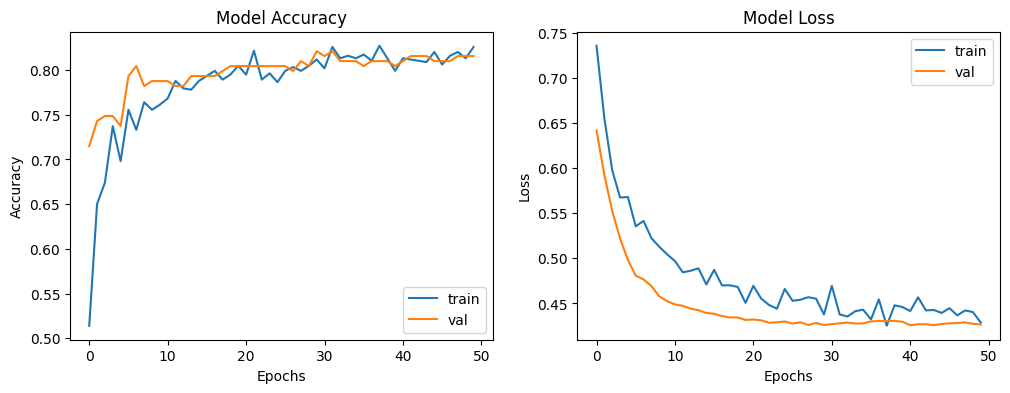

In [14]:
# Predict on the validation set
y_pred_nn = model.predict(X_val)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

# Print evaluation metrics
print("Neural Network Model Accuracy:", accuracy_score(y_val, y_pred_nn))
print(confusion_matrix(y_val, y_pred_nn))
print(classification_report(y_val, y_pred_nn))

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [15]:
# Predict using the Random Forest model
test_pred_rf = rf_model.predict(test_data)

# Predict using the Deep Learning model
test_pred_nn = model.predict(test_data)
test_pred_nn = (test_pred_nn > 0.5).astype(int)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [17]:
# Create submission DataFrame for Random Forest predictions
submission_rf = pd.DataFrame({'PassengerId': pd.read_csv('/kaggle/input/titanic/test.csv')['PassengerId'], 'Survived': test_pred_rf})

# Create submission DataFrame for Neural Network predictions
submission_nn = pd.DataFrame({'PassengerId': pd.read_csv('/kaggle/input/titanic/test.csv')['PassengerId'], 'Survived': test_pred_nn.ravel()})

# Save to CSV files
submission_rf.to_csv('submission_rf.csv', index=False)
submission_nn.to_csv('submission_nn.csv', index=False)
